In [1]:
library(caret)
library(glmnet)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-4



## P1

In [222]:
data(mtcars)

In [228]:
# train test split
trainIdx <- createDataPartition(
  1:dim(mtcars)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
mtcarsTrain <- mtcars[trainIdx,]
mtcarsTest <- mtcars[-trainIdx,]

In [230]:
# fit a linear model
lm.fit <- lm(mpg~., data=mtcarsTrain)
summary(lm.fit)


Call:
lm(formula = mpg ~ ., data = mtcarsTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6391 -1.4391 -0.5401  1.3231  4.0205 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 25.897542  20.560103   1.260    0.225
cyl         -1.230327   1.228177  -1.002    0.331
disp         0.014680   0.021866   0.671    0.511
hp          -0.008249   0.025210  -0.327    0.747
drat         0.794535   1.675798   0.474    0.641
wt          -3.793978   2.265910  -1.674    0.112
qsec         0.592801   0.761424   0.779    0.447
vs           0.502684   2.269571   0.221    0.827
am           2.453146   2.221504   1.104    0.285
gear        -0.620836   1.673476  -0.371    0.715
carb        -0.116887   0.922282  -0.127    0.901

Residual standard error: 2.645 on 17 degrees of freedom
Multiple R-squared:  0.8926,	Adjusted R-squared:  0.8294 
F-statistic: 14.12 on 10 and 17 DF,  p-value: 2.324e-06


We can select the variables with $|t|>1$. We can see that cyl, wt, and am are relavant, and their coefficient are given by $1.23$, $-3.79$, and $2.45$ respectively.

In [287]:
# cross-validation ridge regression
lambda.vec <- seq(from = 0.01, to = 5, by = 0.05)
ridge.fit <- cv.glmnet(x = as.matrix(mtcarsTrain[,2:length(mtcarsTrain)]), y =  mtcarsTrain$mpg, 
                       alpha = 0, lambda = lambda.vec, parallel=TRUE)

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"


In [289]:
# determine the minimum value of lambda
best.lambda <- ridge.fit$lambda.min
best.lambda

[1] 2.86

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

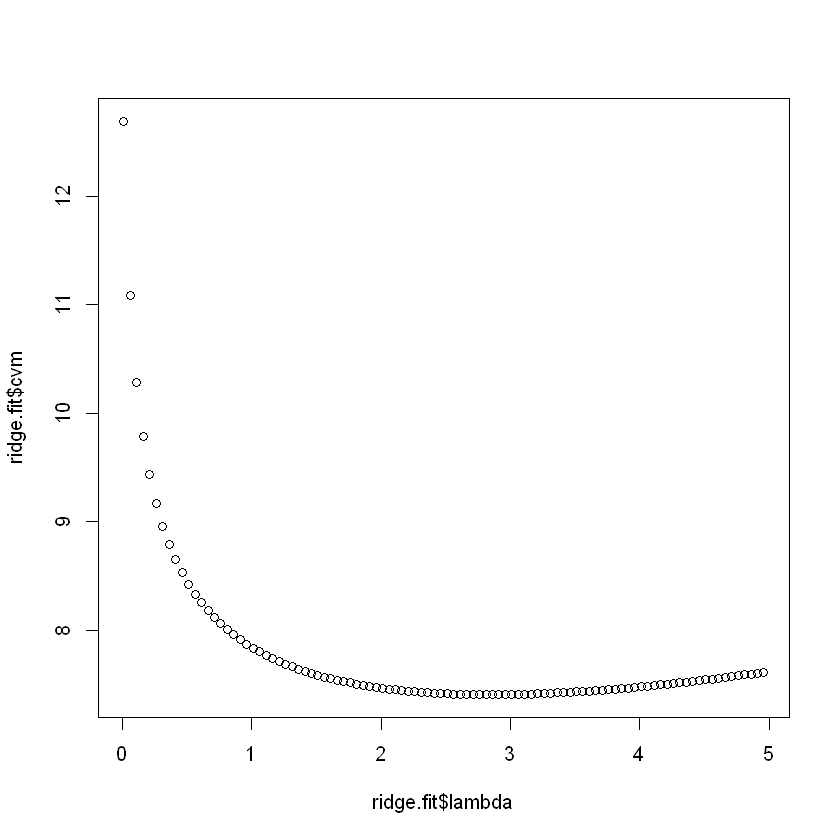

In [290]:
# training 𝑀𝑆𝐸 vs lambda
plot(ridge.fit$lambda, ridge.fit$cvm)

##### Comparison

In [296]:
# out-of sample rmse
ridge.pred <- predict(ridge.fit, as.matrix(mtcarsTest[,2:length(mtcarsTest)]), s=best.lambda)
cal.rmse(c(ridge.pred), mtcarsTest$mpg)

[1] 2.707144

In [291]:
# coefficients for ridge regression
coef(ridge.fit, s=best.lambda)

11 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 21.977621227
cyl         -0.498060199
disp        -0.005472346
hp          -0.009877710
drat         1.190116551
wt          -1.199674725
qsec         0.157991896
vs           0.990896010
am           1.813711971
gear         0.360541677
carb        -0.585599418

We can observe that the coefficient for ridge regression is smaller than that in the original model, but the absolute value are all larger than 0.It basically performs ridge shrinkage for the coefficients.